In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Informações sobre o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Primeiro, vamos excluir as colunas Unnamed: 0 e id, que não tem utilidade para o presente estudo 

In [4]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Há valores nulos/ausentes?
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
# há 310 valores ausentes na coluna Departure Delay in Minutes, eu optei por preencher com a mediana dos atrasos
df['Departure Delay in Minutes'].fillna(df['Departure Delay in Minutes'].median(), inplace=True)
df['Departure Delay in Minutes'].isna().sum()

0

## Perguntas de Negócios

1. Qual a classe mais usada em cada tipo de viagem

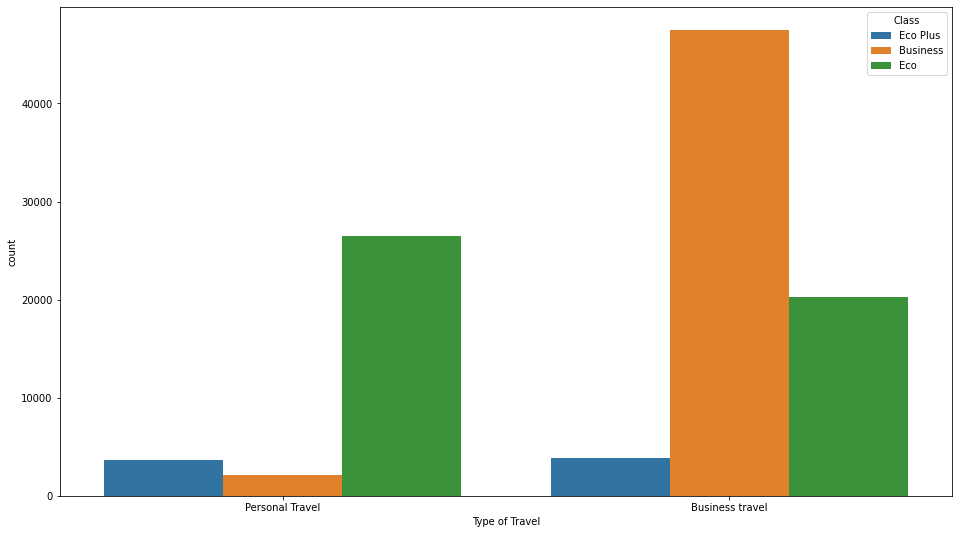

In [17]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='Type of Travel', hue='Class')
plt.show();

Pode-se observar pelo gráfico acima que nas viagens de cunho pessoal a classe mais usada foi a Eco e na viagem a negócios foi a classe Business

2. Qual a média de idade dos passageiros

In [27]:
fig = go.Figure(data=go.Bar(y=[df['Age'].mean()], x=['Age'], name= 'Média de Idade'))
fig.update_layout(title_text='Média de Idade')
fig.show()

3. Qual a média de idade por gênero

In [32]:
media_idades = df.groupby('Gender')['Age'].mean()

fig = go.Figure(data=[
    go.Bar(name='Masculino', x=['Gender'], y=[media_idades['Male']]),
    go.Bar(name='Feminino', x=['Gender'], y=[media_idades['Female']])
])

fig.update_layout(barmode='group', title_text='Média de Idade por Gênero')
fig.show();

4. Qual o Gênero e Tipo de viagem dos passageiros

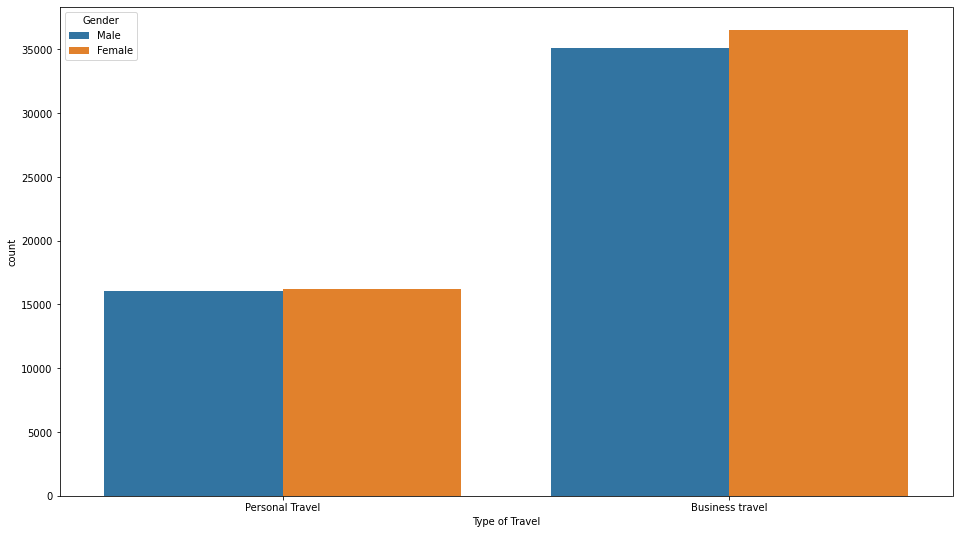

In [28]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='Type of Travel', hue='Gender')
plt.show();

Observa-se que há uma ligeira prevalência para os passageiros do gênero feminino tanto para as viagens pessoais quanto a négocio.

5. Qual a Porcentagem do Nível de Satisfação Geral dos Clientes

In [35]:
counts = df['satisfaction'].value_counts()
porcentagens = counts / len(df) * 100

fig = go.Figure(data=[
    go.Bar(x=counts.index, y=counts.values, text=[f'{p:.2f}%' for p in porcentagens], textposition='auto')
])

fig.update_layout(title_text='Distribuição do Nível de Satisfação', xaxis_title='Nível de Satisfação', yaxis_title='Contagem')
fig.show();


## Vamos Prever a Satisfação usando os algoritmos Random Forest e XGBoost

Importar as bibliotecas

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

Como a coluna-alvo ('satisfaction') é do tipo categórica, ela precisa ser transformada em numérica antes

In [38]:
label_encoder = LabelEncoder()

df['satisfaction_encode'] = label_encoder.fit_transform(df['satisfaction'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Separar os dados em preditores e alvo

In [41]:
preditores = df.iloc[:, 6:20]
alvo = df['satisfaction_encode']

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


Separar os dados em treino e teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(preditores, alvo, test_size=0.3, shuffle=True, random_state=5)

### 1. RANDOM FOREST

Criar e Treinar o Modedelo

In [43]:
rnd_model = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=5)
rnd_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150)

Fazer previsões

In [44]:
rnd_pred = rnd_model.predict(X_test)

Avalição do modelo

In [49]:
print(f'Acurácia: {accuracy_score(y_test, rnd_pred)*100:.2f}%\n')
print(f'Relatório:\n {classification_report(y_test, rnd_pred)}')

Acurácia: 88.25%

Relatório:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     17643
           1       0.89      0.84      0.86     13529

    accuracy                           0.88     31172
   macro avg       0.88      0.88      0.88     31172
weighted avg       0.88      0.88      0.88     31172



Com Random Forest, a probabilidade de o algoritmo acertar a classificação do nível de satisfação do cliente é de 88,25%

## 2. XGBoost

Criar e treinar o modelo

In [50]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Previsões com o modelo

In [51]:
xg_pred = xg_model.predict(X_test)

Avaliação do modelo

In [52]:
print(f'Acurácia: {accuracy_score(y_test, xg_pred)*100:.2f}%\n')
print(f'Relatório:\n {classification_report(y_test, xg_pred)}')

Acurácia: 94.64%

Relatório:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     17643
           1       0.95      0.92      0.94     13529

    accuracy                           0.95     31172
   macro avg       0.95      0.94      0.95     31172
weighted avg       0.95      0.95      0.95     31172



Podemos ver que com o algoritmo XGBoost houve uma melhora significativa na probabilidade de acerto na classificação do nível de satisfação do cliente, foi de 88,25% para 94,64%.

#### Previsão com dados novos usando o algoritmo XGBoost:

In [53]:
novos_dados = [
    [3, 4, 3, 1, 5, 3, 5, 5, 4, 3, 4, 4, 5, 5],
    [3, 2, 3, 3, 1, 3, 1, 1, 1, 5, 3, 1, 4, 1]
]

previsoes = xg_model.predict(novos_dados)

previsoes_categoricas = label_encoder.inverse_transform(previsoes)

print(previsoes_categoricas)

['neutral or dissatisfied' 'neutral or dissatisfied']
